In [1]:
import pickle
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter, Time, Depth
from cmocean import cm
import numpy as np
import matplotlib.pyplot as plt
from PyFVCOM.tide import make_water_column
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
with open('duanmian.pkl','rb') as f:
    ds = pickle.load(f)

with open('zhouwei_fvcom.pkl', 'rb') as f:
    fvcom = pickle.load(f)

In [62]:
## all average
picpath = '/public/home/gaoguandong/xrsh/work/pic/pics/duanmian/sectionBC/'
z = make_water_column(ds.variables['zeta'][:]._data.T, ds.variables['h'][:]._data, fvcom.grid.siglay[:,0:8])
zvar = np.mean(ds.variables['temp'][:].T,1)._data
levels = MaxNLocator(nbins=25).tick_values(zvar.min(), zvar.max())

In [48]:
depth.shape

(20, 8)

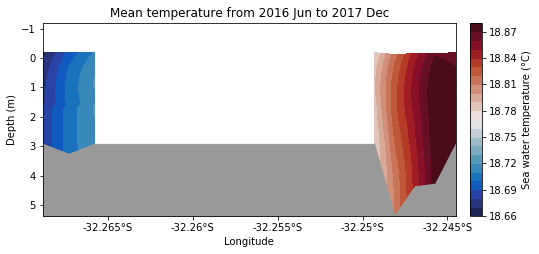

In [63]:
plot = Depth(fvcom, figsize=(20, 9), 
             cb_label='Temperature ({})'.format(fvcom.atts.temp.units),
             cmap=cm.balance)

# fill_seabed makes the part of the plot below the seabed grey.
x = np.tile(ds.variables['lat'][:],(20,1))
depth = (-np.mean(z,1))._data
tp = plot.axes.contourf(x[:,:5], depth[:,:5],zvar[:,:5] ,cmap=cm.balance,levels = levels)
tp = plot.axes.contourf(x[:,-3:], depth[:,-3:],zvar[:,-3:] ,cmap=cm.balance,levels = levels)
plot.axes.set_ylim(bottom=depth.min()-1)
plot.axes.invert_yaxis()
plot.axes.set_title('Mean temperature from 2016 Jun to 2017 Dec')
plot.axes.fill_between(ds.variables['lat'][:], np.max(depth, axis=0), plot.axes.get_ylim()[0], color='0.6')
#plot.axes.shading='interp'
  # set the x-axis to the data range
plot.axes.set_xlabel('Longitude')
plot.axes.set_xticklabels([str(np.around(x,3)) + u'°S' for x in plot.axes.get_xticks()])
plot.axes.set_ylabel('Depth (m)')
# Add a nice colour bar.
div = make_axes_locatable(plot.axes)
cax = div.append_axes("right", size="3%", pad=0.2)
cb = plot.figure.colorbar(tp, cax=cax)
cb.set_label(u"Sea water temperature (°C)")
plt.savefig(picpath+'all_temp.png')
plt.show()

# YEAR

In [64]:
temp = ds.resample(time = '1y').mean()['temp']
ds['z'] = (('depth','time','loc'),z)
z = ds.resample(time = '1y').mean()['z']

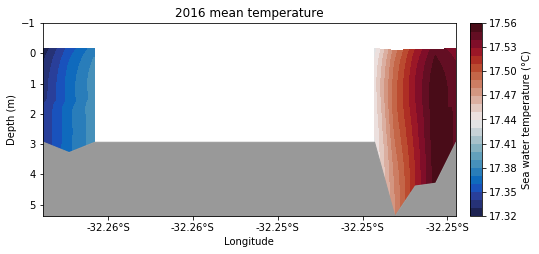

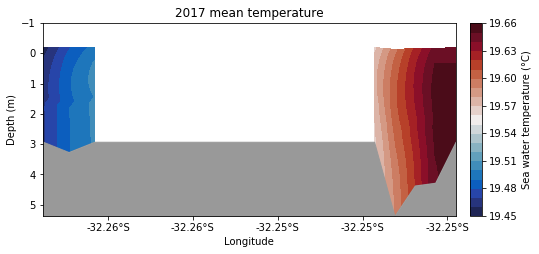

In [65]:
image_list = []

for picn, pictime in enumerate(temp.time):
    timestr = str(pictime._variable._data)[:4]
    zvar = temp._variable._data[picn,:,:].T
    
    plot = Depth(fvcom, figsize=(20, 9), 
                 cb_label='Temperature ({})'.format(fvcom.atts.temp.units),
                 cmap=cm.balance)
    depth = -z[picn,:,:]
    levels = MaxNLocator(nbins=25).tick_values(zvar.min(), zvar.max())
    tp = plot.axes.contourf(x[:,:5], depth[:,:5],zvar[:,:5] ,cmap=cm.balance,levels = levels)
    tp = plot.axes.contourf(x[:,-3:], depth[:,-3:],zvar[:,-3:] ,cmap=cm.balance,levels = levels)
    plot.axes.set_ylim(bottom=-1)
    plot.axes.invert_yaxis()
    plot.axes.set_title(timestr+ ' mean temperature')
    plot.axes.fill_between(ds.variables['lat'][:], np.max(depth, axis=0), plot.axes.get_ylim()[0], color='0.6')
    #plot.axes.shading='interp'
      # set the x-axis to the data range
    plot.axes.set_xlabel('Longitude')
    plot.axes.set_xticklabels([str(np.around(x,2)) + u'°S' for x in plot.axes.get_xticks()])
    plot.axes.set_ylabel('Depth (m)')
    # Add a nice colour bar.
    div = make_axes_locatable(plot.axes)
    cax = div.append_axes("right", size="3%", pad=0.2)
    cb = plot.figure.colorbar(tp, cax=cax)
    cb.set_label(u"Sea water temperature (°C)")
    plt.savefig(picpath+timestr+'_temp.png')
    plt.show()

# Month

In [66]:
temp = ds.resample(time = '1m').mean()['temp']
z = ds.resample(time = '1m').mean()['z']

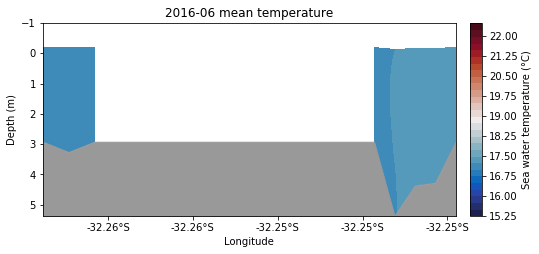

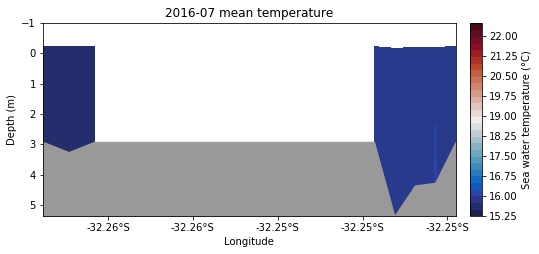

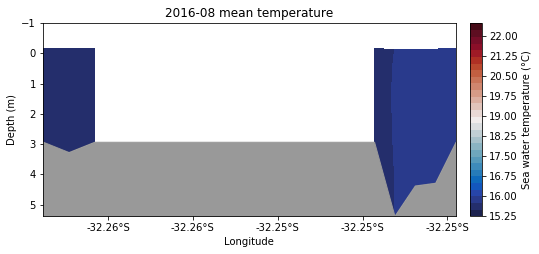

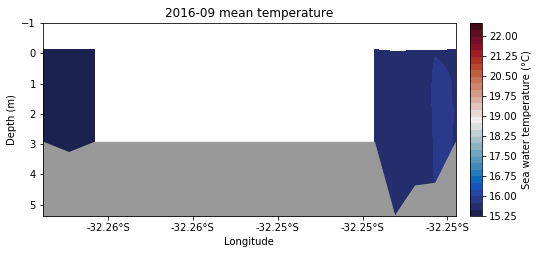

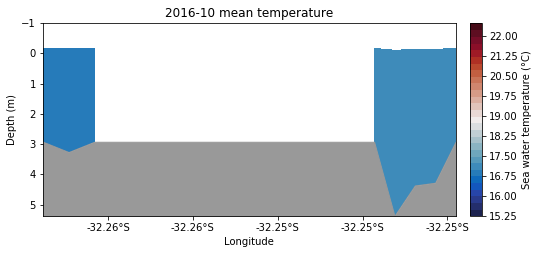

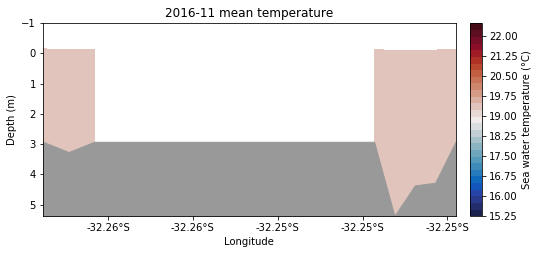

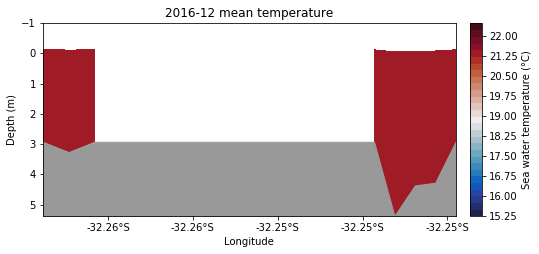

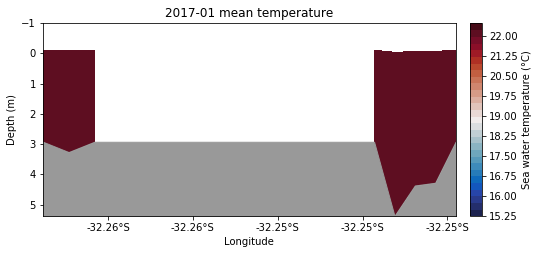

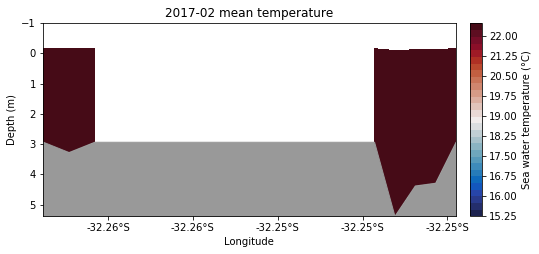

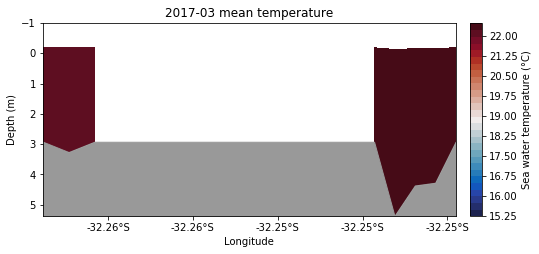

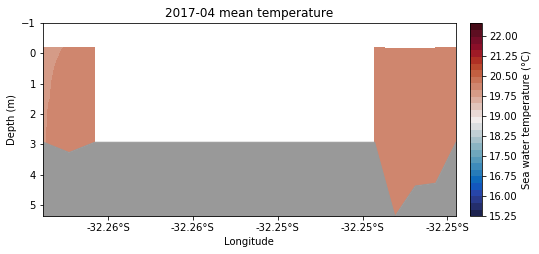

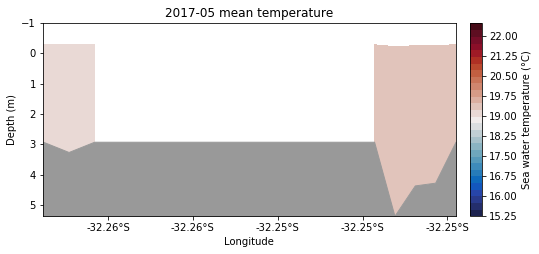

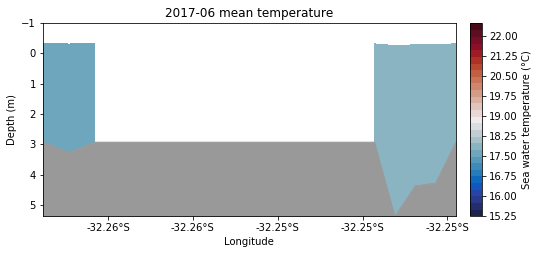

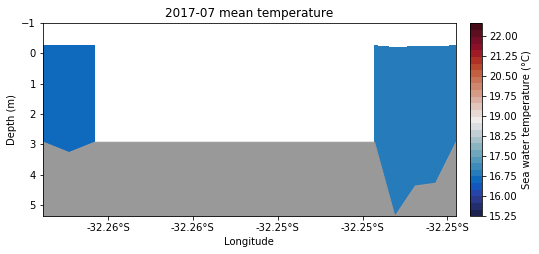

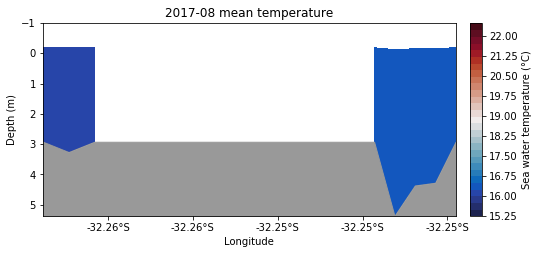

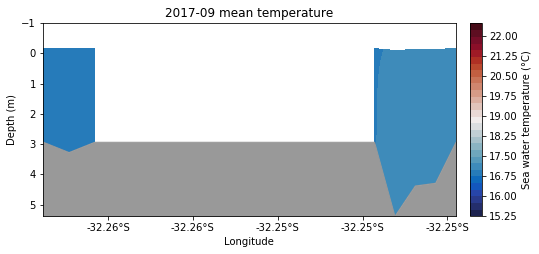

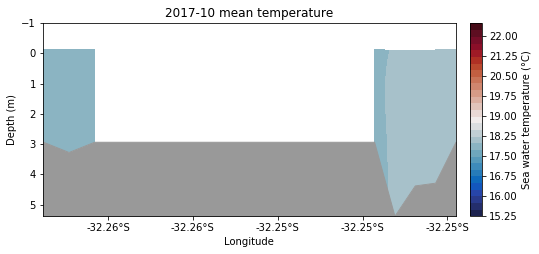

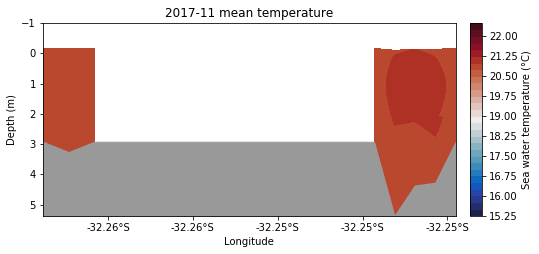

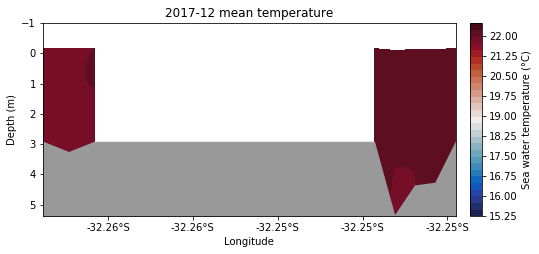

In [67]:
levels = MaxNLocator(nbins=30).tick_values(temp._variable._data.min(), temp._variable._data.max())
image_list = []

for picn, pictime in enumerate(temp.time):
    timestr = str(pictime._variable._data)[:7]
    zvar = temp._variable._data[picn,:,:].T

    plot = Depth(fvcom, figsize=(20, 9), 
                 cb_label='Temperature ({})'.format(fvcom.atts.temp.units),
                 cmap=cm.balance)
    depth = -z[picn,:,:]
   # levels = MaxNLocator(nbins=25).tick_values(zvar.min(), zvar.max())
    tp = plot.axes.contourf(x[:,:5], depth[:,:5],zvar[:,:5] ,cmap=cm.balance,levels = levels)
    tp = plot.axes.contourf(x[:,-3:], depth[:,-3:],zvar[:,-3:] ,cmap=cm.balance,levels = levels)
    plot.axes.set_ylim(bottom=-1)
    plot.axes.invert_yaxis()
    plot.axes.set_title(timestr+ ' mean temperature')
    plot.axes.fill_between(ds.variables['lat'][:], np.max(depth, axis=0), plot.axes.get_ylim()[0], color='0.6')
    #plot.axes.shading='interp'
      # set the x-axis to the data range
    plot.axes.set_xlabel('Longitude')
    plot.axes.set_xticklabels([str(np.around(x,2)) + u'°S' for x in plot.axes.get_xticks()])
    plot.axes.set_ylabel('Depth (m)')
    # Add a nice colour bar.
    div = make_axes_locatable(plot.axes)
    cax = div.append_axes("right", size="3%", pad=0.2)
    cb = plot.figure.colorbar(tp, cax=cax)
    cb.set_label(u"Sea water temperature (°C)")
    plt.savefig(picpath+'month/'+timestr+'_temp.png')
    plt.show()